<a href="https://colab.research.google.com/github/leofanci/ML_works/blob/main/ML8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [64]:
df = pd.read_csv("/content/gdrive/MyDrive/ML/bank-additional-full.csv", sep = ";")

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)


In [67]:
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57,149,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,226,no,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,151,no,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,307,no,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [68]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)

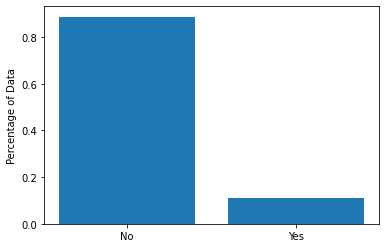

In [69]:
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [70]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_scaled, y_train = smote.fit_resample(X_scaled, y_train)

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [72]:
dtree = DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

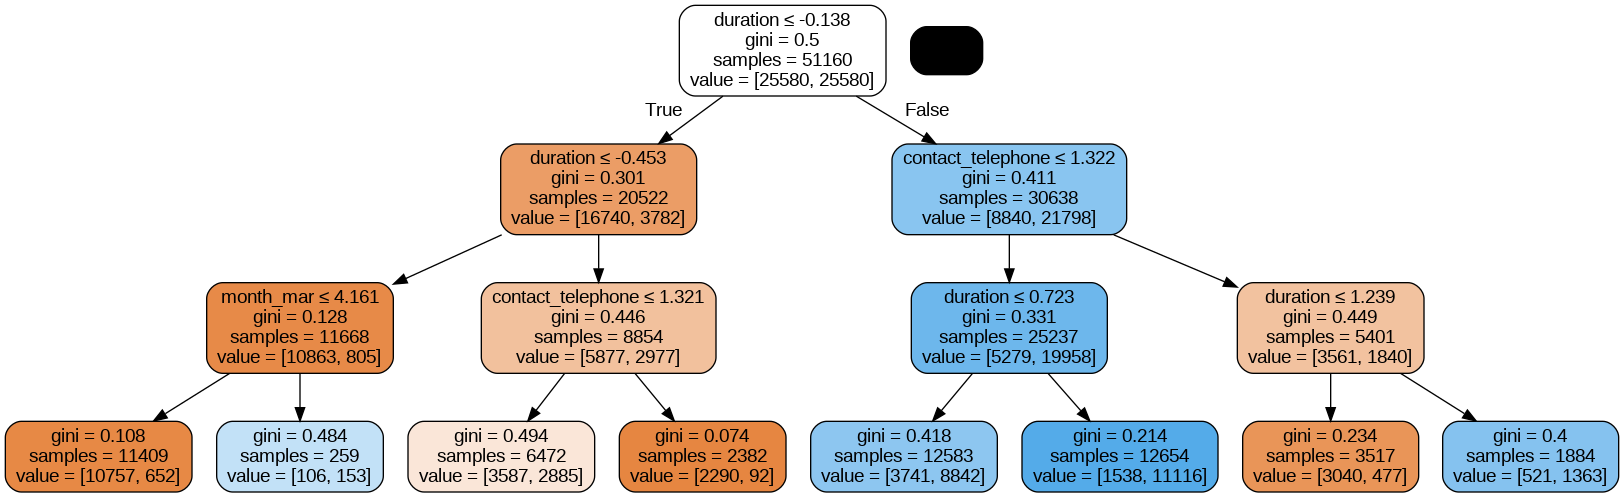

In [76]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

feature_names = list(X.columns)
dot_data = export_graphviz(dtree, out_file=None, feature_names=feature_names,
                                filled=True, rounded=True,
                                special_characters=True)


graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [74]:
y_pred = dtree.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

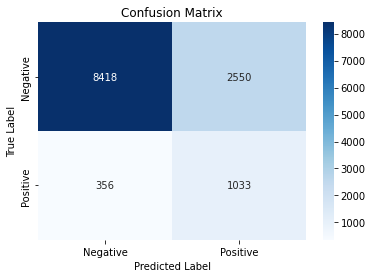

In [77]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree 

In [78]:
dtree = DecisionTreeClassifier(max_depth = 3)

bagging = BaggingClassifier(estimator=dtree, 
                            n_estimators=100, 
                            max_samples=0.5, 
                            max_features=1.)

bagging.fit(X_scaled, y_train)

y_pred = bagging.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7540665210002427


In [79]:
y_pred = bagging.predict(X_test)
y_true = y_test
cm_bag = confusion_matrix(y_true, y_pred)

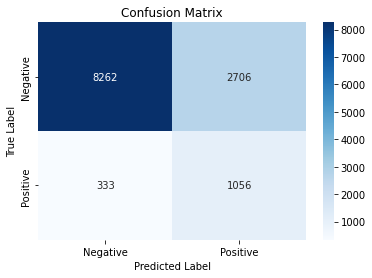

In [80]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
dtree = DecisionTreeClassifier(max_depth=3)
adaboost = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, learning_rate=0.1)

adaboost.fit(X_scaled, y_train)

y_pred = adaboost.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [83]:
y_pred = adaboost.predict(X_test)
y_true = y_test
cm_boost = confusion_matrix(y_true, y_pred)

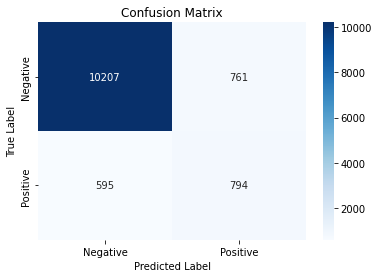

In [84]:
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 5.) Create a superlearner with at least 5 base learner models. Use a logistic reg for your metalearner. Interpret your coefficients and save your CM.

In [85]:
pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlens.ensemble import SuperLearner

In [87]:
### SET YOUR BASE LEARNERS
base_estimators = [
    LogisticRegression(),
    RandomForestClassifier(),
    LassoCV(),
    MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=1000),
    KNeighborsClassifier(n_neighbors=3)
    ]

super_learner = SuperLearner(folds=3, random_state=42)
super_learner.add(base_estimators)

SuperLearner(array_check=None, backend=None, folds=3,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7270, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=3, raise_on_ex...rer=None)],
   n_jobs=-1, name='group-6', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=42, sample_size=20, scorer=None, shuffle=False,
       verbose=False)

In [88]:
### FIT TO TRAINING DATA
super_learner.fit(X_scaled, y_train)

### GET base_predictions
base_prediction = super_learner.predict(X_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [89]:
### TRAIN YOUR METALEARNER
log_reg = LogisticRegression(fit_intercept = False).fit(base_prediction, y_train)
y_pred = log_reg.predict(super_learner.predict(X_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [90]:
### INTERPRET COEFFICIENTS
log_reg.coef_

array([[ -1.16307243, -12.68726693,   2.31397724,   0.08097877,
         28.63942234]])

**Logistic Regression**<br>
-1.163 -> the corresponding predictor variables have a negative relationship with the outcome variable.<br> 
**Random Forest**<br>
-12.687 -> the corresponding predictor variables have a negative relationship with the outcome variable and it is more weighted than logit.<br>
**Lasso**<br>
2.324 -> classifies correctly: as that variable increases, the predicted probability of the outcome also increases.<br>
**Multilayer Perceptrons**<br>
0.081 -> little or no influence on the final prediction.<br>
**KNN**<br>
28.639 -> classify correctly and has a stronger influence on the predicted probability of the outcome.

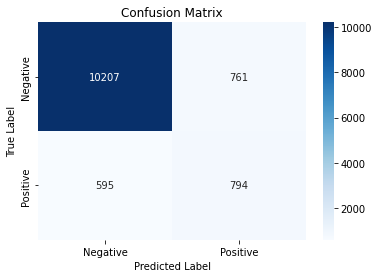

In [91]:
### MAKE, SAVE AND VISUALIZE YOUR CONFUSION MATRIX
cm_log = confusion_matrix(y_true, y_pred)
class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_boost, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 6.) Create a bar chart comparing decision tree, bagged, boosted and super learner Sensitivities (Out of Sample)

In [92]:
### Decision Tree
total = sum(sum(cm_raw))
Accuracy_raw = (cm_raw[0,0]+cm_raw[1,1])/total
Specificity_raw = (cm_raw[0,0]/(cm_raw[0,0]+cm_raw[0,1]))
Sensitivity_raw = (cm_raw[1,1]/(cm_raw[1,0]+cm_raw[1,1]))

print("Accuracy_raw:", Accuracy_raw)
print("Specificity_raw:", Specificity_raw)
print("Sensitivity_raw:", Sensitivity_raw)

Accuracy_raw: 0.7648296512098406
Specificity_raw: 0.7675054704595186
Sensitivity_raw: 0.7437005039596832


In [93]:
### Bagging
total = sum(sum(cm_bag))
Accuracy_bag = (cm_bag[0,0]+cm_bag[1,1])/total
Specificity_bag = (cm_bag[0,0]/(cm_bag[0,0]+cm_bag[0,1]))
Sensitivity_bag = (cm_bag[1,1]/(cm_bag[1,0]+cm_bag[1,1]))

print("Accuracy_bag:", Accuracy_bag)
print("Specificity_bag:", Specificity_bag)
print("Sensitivity_bag:", Sensitivity_bag)

Accuracy_bag: 0.7540665210002427
Specificity_bag: 0.7532822757111597
Sensitivity_bag: 0.7602591792656588


In [94]:
### Boosting
total = sum(sum(cm_boost))
Accuracy_boost = (cm_boost[0,0]+cm_boost[1,1])/total
Specificity_boost = (cm_boost[0,0]/(cm_boost[0,0]+cm_boost[0,1]))
Sensitivity_boost = (cm_boost[1,1]/(cm_boost[1,0]+cm_boost[1,1]))

print("Accuracy_boost:", Accuracy_boost)
print("Specificity_boost:", Specificity_boost)
print("Sensitivity_boost:", Sensitivity_boost)

Accuracy_boost: 0.8902646273367322
Specificity_boost: 0.9306163384390955
Sensitivity_boost: 0.5716342692584593


In [95]:
# Super Learning
total = sum(sum(cm_log))
Accuracy_log = (cm_log[0,0]+cm_log[1,1])/total
Specificity_log = (cm_log[0,0]/(cm_log[0,0]+cm_log[0,1]))
Sensitivity_log = (cm_log[1,1]/(cm_log[1,0]+cm_log[1,1]))

print("Accuracy_log:", Accuracy_log)
print("Specificity_log:", Specificity_log)
print("Sensitivity_log:", Sensitivity_log)

Accuracy_log: 0.8132232742575058
Specificity_log: 0.8641502552881108
Sensitivity_log: 0.4110871130309575


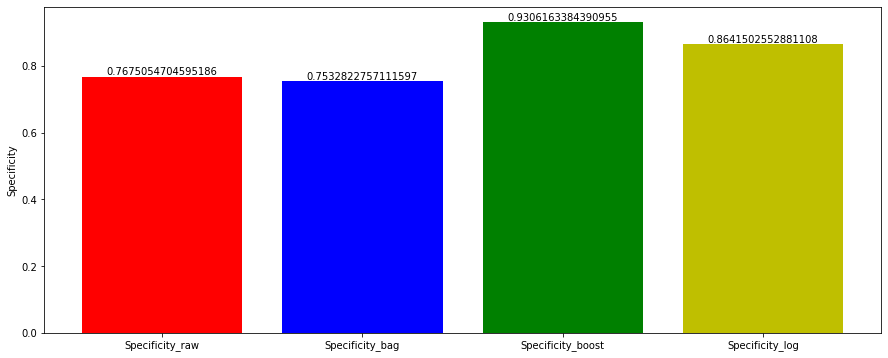

In [96]:
### SPECIFICITY

specificity_scores = [Specificity_raw, Specificity_bag, Specificity_boost, Specificity_log]
labels = ['Specificity_raw', 'Specificity_bag', 'Specificity_boost', 'Specificity_log']
colors = ['r', 'b', 'g', 'y']

fig, ax = plt.subplots(figsize = (15,6))
ax.bar(labels, specificity_scores, color=colors)
for i, m in enumerate(specificity_scores):
    ax.text(i, m, str(m), ha='center', va='bottom')
ax.set_ylabel('Specificity')
plt.show()

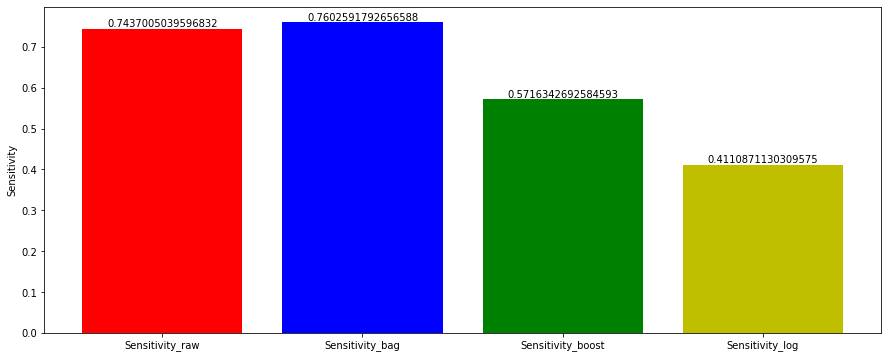

In [97]:
### SENSITIVITY

sensitivity_scores = [Sensitivity_raw, Sensitivity_bag, Sensitivity_boost, Sensitivity_log]
labels = ['Sensitivity_raw', 'Sensitivity_bag', 'Sensitivity_boost', 'Sensitivity_log']
colors = ['r', 'b', 'g', 'y']

fig, ax = plt.subplots(figsize = (15,6))
ax.bar(labels, sensitivity_scores, color=colors)
for i, m in enumerate(sensitivity_scores):
    ax.text(i, m, str(m), ha='center', va='bottom')
ax.set_ylabel('Sensitivity')
plt.show()

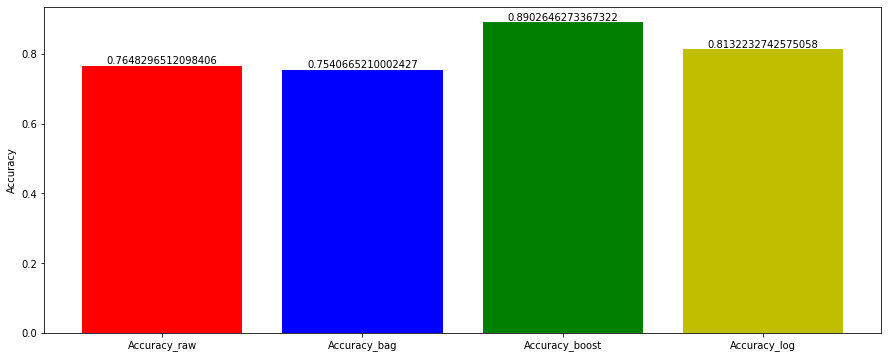

In [98]:
### ACCURACY

accuracy_scores = [Accuracy_raw, Accuracy_bag, Accuracy_boost, Accuracy_log]
labels = ['Accuracy_raw', 'Accuracy_bag', 'Accuracy_boost', 'Accuracy_log']
colors = ['r', 'b', 'g', 'y']

fig, ax = plt.subplots(figsize = (15,6))
ax.bar(labels, accuracy_scores, color=colors)
for i, m in enumerate(accuracy_scores):
    ax.text(i, m, str(m), ha='center', va='bottom')
ax.set_ylabel('Accuracy')
plt.show()